這篇文章練習上次Sean所提供的程式碼與視覺化，練習用這樣的方式看下福盟與伴侶盟兩方語料的字詞是否有某一方特別愛用的詞。

In [1]:
import re
from typing import List
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import jieba

 ## 1. 匯入資料

In [5]:
def read_text(fpath):
    fin = open(fpath, "r", encoding="UTF-8")
    text = fin.read().strip()
    cjk_pat = re.compile("[\u4e00-\u9fff]+")
    tokens_iter = jieba.cut(text)
    tokens_iter = filter(lambda x: cjk_pat.match(x), tokens_iter)
    tokens = list(tokens_iter)
    return tokens

def make_wfreq_series(tokens: List[str]):
    wfreq = Counter(tokens)
    series = pd.Series(wfreq)
    return series

pro = read_text("lgbtfamily.txt")
anti = read_text("lovefamily.txt")
series1 = make_wfreq_series(pro)
series2 = make_wfreq_series(anti)


## 2. Explorative Data Analysis

 ### 2.1. 將資料轉換成DataFrame

這一步要做的是將每個詞映射在一個二維平面上的點，該點的x座標是該詞在語料A中出現的頻率，而y座標為該詞出現在語料B中出現的頻率。

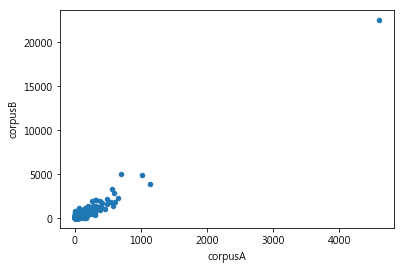

In [6]:
bicorp = pd.DataFrame(dict(corpusA=series1, corpusB=series2))
bicorp.fillna(0, inplace=True)
bicorp['overall'] = bicorp.corpusA + bicorp.corpusB
bicorp.plot(x='corpusA', y='corpusB', kind='scatter')


可以看到除了右上角有一個點之外（應該就是兩個語料都大量出現的一個詞），其他幾乎都擠在左下角。為了要讓擠在左下角的那一坨散開，我們可以使用log轉換，拉開距離。

### 2.2. 進行log轉換

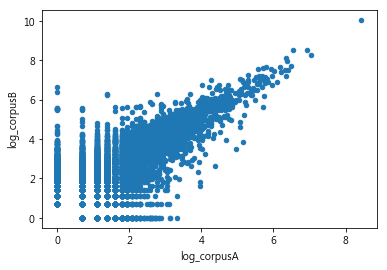

In [7]:
bicorp['log_corpusA'] = np.log(bicorp.corpusA+1)
bicorp['log_corpusB'] = np.log(bicorp.corpusB+1)
bicorp.plot(x='log_corpusA', y='log_corpusB', kind='scatter')

散開後，我們可以看見呈現沿著對角線分布的詞，而我們好奇的就是散佈在左上三角形中的詞（出現在語料B中大於語料庫A的）以及右下三角形的詞（出現在A語料中大於語料B的）。

### 2.3 計算對比分數（`log_corpusB - log_corpusA`）

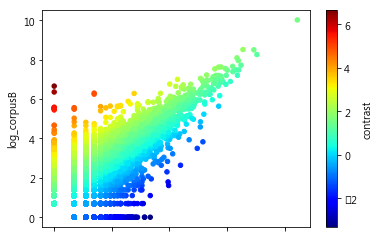

In [9]:
bicorp['contrast'] = bicorp.log_corpusB - bicorp.log_corpusA
bicorp.plot(x='log_corpusA', y='log_corpusB', c='contrast', 
    colormap='jet', kind='scatter')


### 2.5 按出現在語料庫B（下福盟）中最特殊的詞排列

In [10]:
bicorp.sort_values('contrast', ascending=False).head(10)

,corpusA,corpusB,overall,log_corpusA,log_corpusB,contrast
投稿,0.0,778.0,778.0,0.000000,6.658011,6.658011
同運,0.0,577.0,577.0,0.000000,6.359574,6.359574
附,0.0,265.0,265.0,0.000000,5.583496,5.583496
最新消息,0.0,262.0,262.0,0.000000,5.572154,5.572154
增刪,0.0,250.0,250.0,0.000000,5.525453,5.525453
須知,0.0,249.0,249.0,0.000000,5.521461,5.521461
筆名,0.0,248.0,248.0,0.000000,5.517453,5.517453
信時,0.0,247.0,247.0,0.000000,5.513429,5.513429
色情,0.0,231.0,231.0,0.000000,5.446737,5.446737
本站,3.0,545.0,548.0,1.386294,6.302619,4.916325


### 2.6 按出現在語料庫A(伴侶盟)中最特殊的詞排列

In [11]:
bicorp.sort_values('contrast', ascending=True).head(10)


,corpusA,corpusB,overall,log_corpusA,log_corpusB,contrast
祁家威,27.0,0.0,27.0,3.332205,0.0,-3.332205
伊斯,22.0,0.0,22.0,3.135494,0.0,-3.135494
縣長,22.0,0.0,22.0,3.135494,0.0,-3.135494
費瑟,17.0,0.0,17.0,2.890372,0.0,-2.890372
建物,16.0,0.0,16.0,2.833213,0.0,-2.833213
小風,16.0,0.0,16.0,2.833213,0.0,-2.833213
員警,15.0,0.0,15.0,2.772589,0.0,-2.772589
雲林縣,14.0,0.0,14.0,2.708050,0.0,-2.708050
師團,14.0,0.0,14.0,2.708050,0.0,-2.708050
下福盟,14.0,0.0,14.0,2.708050,0.0,-2.708050


### 2.7 大量出現在兩個語料中的詞

In [12]:
bicorp.sort_values('overall', ascending=False).head(10)

,corpusA,corpusB,overall,log_corpusA,log_corpusB,contrast
的,4601.0,22434.0,27035.0,8.434246,10.018378,1.584131
是,1017.0,4913.0,5930.0,6.925595,8.499844,1.574248
同性,697.0,4996.0,5693.0,6.548219,8.516593,1.968374
在,1133.0,3873.0,5006.0,7.033506,8.262043,1.228536
婚姻,566.0,3274.0,3840.0,6.340359,8.094073,1.753714
有,594.0,2839.0,3433.0,6.388561,7.951559,1.562998
對,652.0,2254.0,2906.0,6.481577,7.720905,1.239328
為,488.0,2129.0,2617.0,6.192362,7.663877,1.471515
和,325.0,2059.0,2384.0,5.786897,7.630461,1.843564
也,603.0,1768.0,2371.0,6.403574,7.478170,1.074595


「同性」和「婚姻」這兩個詞很有趣，打敗了諸多功能詞，擠進兩語料常用詞前十名，尤其是在語料庫B中，「同性」一詞的使用甚至高於「在」一詞的使用。